In [1]:
import glob,os
import sys
import matplotlib
import matplotlib.pyplot as plt
import mdtraj as md
sys.path.append('/home/bxie/MOR/analysis/trajectories')
import calc_RMSDs
from calc_RMSDs import _savi_ave
import warnings
warnings.filterwarnings('ignore')

In [2]:
def calc_rmsd_for_receptor_and_ligand(ligtop, top_pdb,traj_dcd):
    structure=md.load(top_pdb)
    atom_slices = structure.topology.select_atom_indices(selection = 'heavy') # consider heavy atoms
    heavy_structure = structure.atom_slice(atom_slices)

    if ligtop:
        atom_indexes = heavy_structure.topology.select('name CA and chainid 1')
    else:
        atom_indexes = heavy_structure.topology.select('name CA and chainid 0')
    trajectory = md.load(traj_dcd, top = structure, atom_indices = atom_indexes)
    trajectory.superpose(trajectory, frame = 0) # receptor traj
    receptor_rmsds = md.rmsd(trajectory,trajectory,0)  
    receptor_rmsds = [r*10.0 for r in receptor_rmsds]
    if ligtop:
        init_atom_indexes = structure.topology.select('chainid 0')
        atom_indexes = []
        for i in init_atom_indexes:
            if not 'H' in str(structure.topology.atom(i)):
                atom_indexes.append(i)       
    else:
        #atom_indexes = heavy_structure.topology.select('chainid 1')
        init_atom_indexes = structure.topology.select('chainid 1')
        atom_indexes = []
        for i in init_atom_indexes:
            if not 'H' in str(structure.topology.atom(i)):
                atom_indexes.append(i)  
                
    trajectory = md.load(traj_dcd, top = structure, atom_indices = atom_indexes)
    trajectory.superpose(trajectory, frame = 0) # ligand traj
    ligand_rmsds = md.rmsd(trajectory,trajectory,0)  
    ligand_rmsds = [r*10.0 for r in ligand_rmsds]
    return receptor_rmsds, ligand_rmsds


In [3]:
home_dir = '/home/bxie/PycharmProjects/KDEL/kdel_simulation'
current_dir = os.getcwd()
os.chdir(home_dir)
RMSDs = {}
lig_RMSDs={}
FNs = ['KDEL_xtal_restrain','KDEL_xtal_restrain_rep1','KDEL_xtal_restrain_rep2','KDEL_igslel_restrain','KDEL_igslel_restrain_rep1','KDEL_igslel_restrain_rep2','KDEL_ihspdl_restrain','KDEL_ihspdl_restrain_rep1']
for FN in FNs:
    top_pdb = os.path.join(home_dir,FN,'output',FN+'.pdb')
    traj_dcd = os.path.join(home_dir,FN,'output','interval1200_'+FN+'.dcd')
    if 'igslel' in FN:
        ligtop=True
        RMSDs[FN], lig_RMSDs[FN] = calc_rmsd_for_receptor_and_ligand(ligtop, top_pdb,traj_dcd)
    else:
        ligtop=False
        RMSDs[FN], lig_RMSDs[FN] = calc_rmsd_for_receptor_and_ligand(ligtop, top_pdb,traj_dcd)

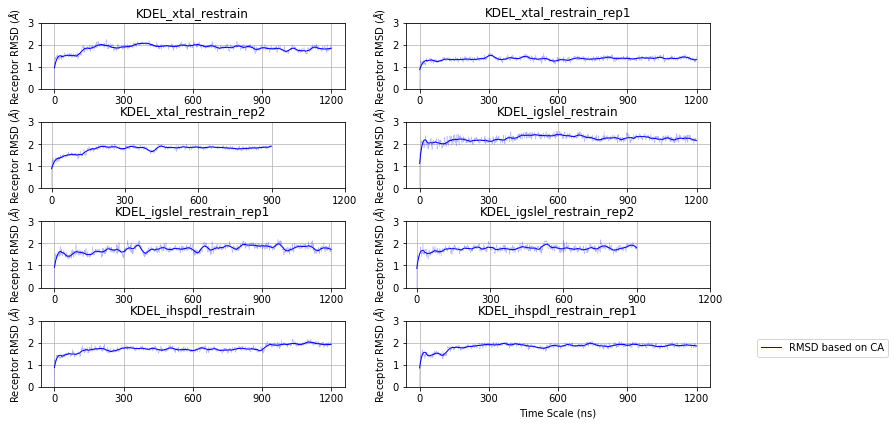

<Figure size 432x288 with 0 Axes>

In [4]:
plot_index=1
plt.figure(figsize=(12,14))
for i in range(len(FNs)):
    plt.subplot(len(FNs), 2, plot_index)
    ave_rmsds = _savi_ave(RMSDs[FNs[i]], 51, 3)
    plt.plot(ave_rmsds, color='blue', lw=1, label = 'RMSD based on CA')
    plt.plot(RMSDs[FNs[i]], color='blue', lw= 0.5, alpha=0.3)
    plt.ylim(0,3)
    plt.title(FNs[i])
    plot_index+=1
    plt.grid(axis='y',alpha=0.9)
    plt.grid(axis='x',alpha=0.9)
    plt.ylabel('Receptor RMSD ($\AA$)')
    plt.xticks([0,1250/5,2500/5,3750/5,5000/5], ['0','300','600','900','1200'])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.6, 0.8))
plt.xlabel('Time Scale (ns)')
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.clf()

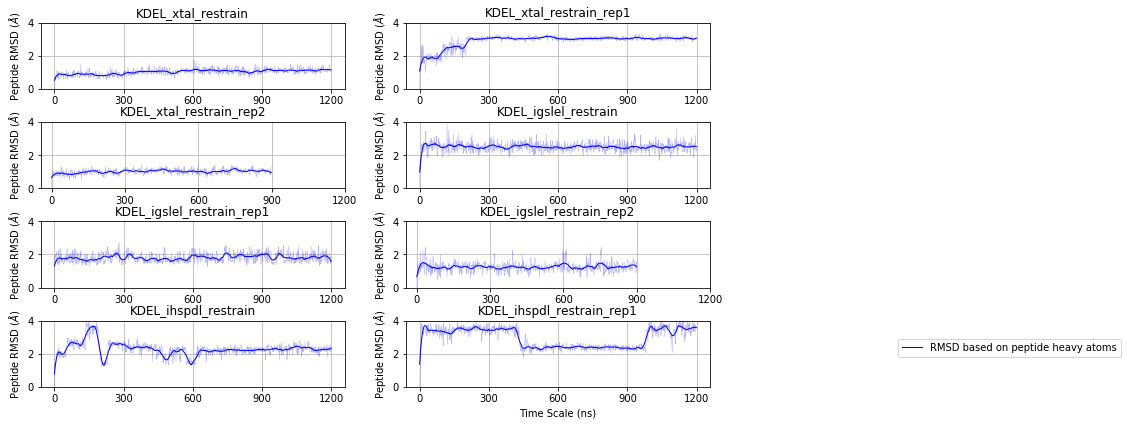

<Figure size 432x288 with 0 Axes>

In [5]:
plot_index=1
plt.figure(figsize=(12,14))
for i in range(len(FNs)):
    plt.subplot(len(FNs), 2, plot_index)
    ave_rmsds = _savi_ave(lig_RMSDs[FNs[i]], 51, 3)
    plt.plot(ave_rmsds, color='blue', lw=1, label = 'RMSD based on peptide heavy atoms')
    plt.plot(lig_RMSDs[FNs[i]], color='blue', lw= 0.5, alpha=0.3)
    plt.ylim(0,4)
    plt.title(FNs[i])
    plot_index+=1
    plt.grid(axis='y',alpha=0.9)
    plt.grid(axis='x',alpha=0.9)
    plt.ylabel('Peptide RMSD ($\AA$)')
    plt.xticks([0,1250/5,2500/5,3750/5,5000/5], ['0','300','600','900','1200'])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.6, 0.8))
plt.xlabel('Time Scale (ns)')
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.clf()